In [ ]:
# This code can be used to perform various evaluation techniques on our predictions

# Note: I did not write this code to be run sequentially
# These code blocks are independent and are meant to be integrated into...
# our training / testing scripts as they require data from these scripts

# all of these code blocks require y_actual (the actual labels of the data)...
# and y_pred (our predicted labels)

In [ ]:
# code to perform accuracy calculations
'''
3 different techniques are used to calculate metrics since problem is multi-class
we can choose a version if we don't want to use all 3
'''

# when integrated into final script this code will need to be applied to all models

from sklearn.metrics import precision_score, recall_score, fbeta_score, accuracy_score

# metrics calculated for each class and averaged
precision_macro = precision_score(y_actual, y_pred, average='macro')
recall_macro = recall_score(y_actual, y_pred, average='macro')
fscore_macro = fbeta_score(y_actual, y_pred, beta=1, average='macro')

# uses sums of tp, fp, and fn to perform calculations
precision_micro = precision_score(y_actual, y_pred, average='micro')
recall_micro = recall_score(y_actual, y_pred, average='micro')
fscore_micro = fbeta_score(y_actual, y_pred, beta=1, average='micro')

# weighted average of metrics calculated independently for each class
precision_weighted = precision_score(y_actual, y_pred, average='weighted')
recall_weighted = recall_score(y_actual, y_pred, average='weighted')
fscore_weighted = fbeta_score(y_actual, y_pred, beta=1, average='weighted')

# overall accuracy
accuracy = accuracy_score(y_true, y_pred)

print("Precision (Macro):", precision_macro)
print("Recall (Macro):", recall_macro)
print("F1 Score (Macro):", fscore_macro)
print("Precision (Micro):", precision_micro)
print("Recall (Micro):", recall_micro)
print("F1 Score (Micro):", fscore_micro)
print("Precision (Weighted):", precision_weighted)
print("Recall (Weighted):", recall_weighted)
print("F1 Score (Weighted):", fscore_weighted)
print("Overall Accuracy: ", accuracy)

# we can write our own code to perform these computations should we run into issues with sklearn

In [ ]:
# code to visualize contingency tables
'''
we will have lots of these considering we have multiple classes
and multiple models, so we will likely only use some of the tables
'''

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


# create confusion matrix
cm = confusion_matrix(y_actual, y_pred)

num_classes = cm.shape[0]

# create and plot a contingency table for every class
for class_index in range(num_classes):
    tp = cm[class_index, class_index]
    fn = cm[class_index, :].sum() - tp
    fp = cm[:, class_index].sum() - tp
    tn = cm.sum() - (tp + fn + fp)

    # create contingency table
    contingency_table = np.array([[tp, fn],
                                  [fp, tn]])

    # calculate row and column totals
    row_totals = contingency_table.sum(axis=1)
    col_totals = contingency_table.sum(axis=0)
    grand_total = contingency_table.sum()

    # plot contingency table
    fig, ax = plt.subplots(figsize=(5, 5))

    ax.matshow(np.ones_like(contingency_table), cmap="Blues", alpha=0.1)

    # write values
    for i in range(2):
        for j in range(2):
            ax.text(j, i, f"{contingency_table[i, j]}", ha='center', va='center', fontsize=14)

    # write totals
    ax.text(2, 0, f"{col_totals[0]}", ha='center', va='center', fontsize=14, fontweight='bold')
    ax.text(2, 1, f"{col_totals[1]}", ha='center', va='center', fontsize=14, fontweight='bold')
    ax.text(0, 2, f"{row_totals[0]}", ha='center', va='center', fontsize=14, fontweight='bold')
    ax.text(1, 2, f"{row_totals[1]}", ha='center', va='center', fontsize=14, fontweight='bold')
    ax.text(2, 2, f"{grand_total}", ha='center', va='center', fontsize=14, fontweight='bold')

    # add row/column labels and plot
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(['Actual Positive', 'Actual Negative', 'Total'], fontsize=12)
    ax.set_yticks([0, 1, 2])
    ax.set_yticklabels(['Predicted Positive', 'Predicted Negative', 'Total'], fontsize=12)
    ax.set_title(f'Contingency Table for Class {class_index}', fontsize=16)

    plt.show()


NameError: name 'y_actual' is not defined

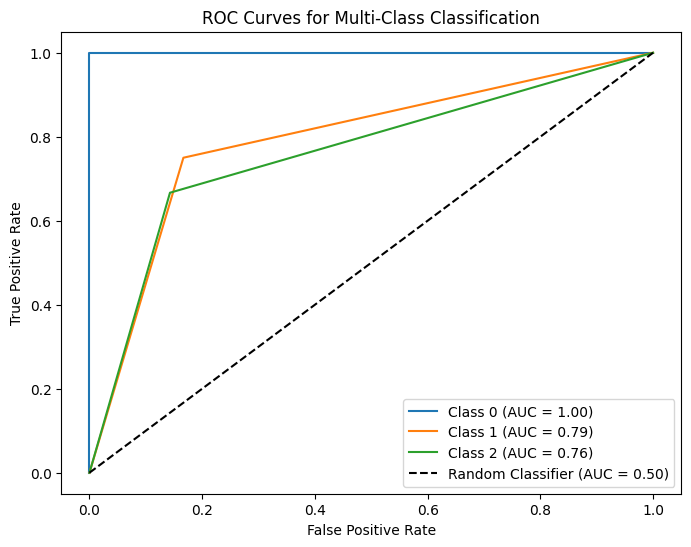

In [ ]:
# code to plot ROC curves for all classes
'''
again, since we have multiple models we will have a plot for every model.
fortunately, all ROC curves can be represented in one plot so we can likely use
a ROC curve for all models
'''

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# variables needed
y_actual = np.array()
y_pred = np.array()
model_type = ''

# classes need to be one hot encoded
num_classes = len(np.unique(y_actual))
y_actual_binarized = label_binarize(y_actual, classes=np.arange(num_classes))

# compute ROC curve and area under curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_actual_binarized[:, i], y_pred == i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# plot all curves on one graph
plt.figure(figsize=(8, 6))

# plot curve for each class
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# plot diagonal (random classifier) for reference
#plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.50)')

# add row/column labels, legend, and plot
plt.title(f'ROC Curves for {model_type} Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


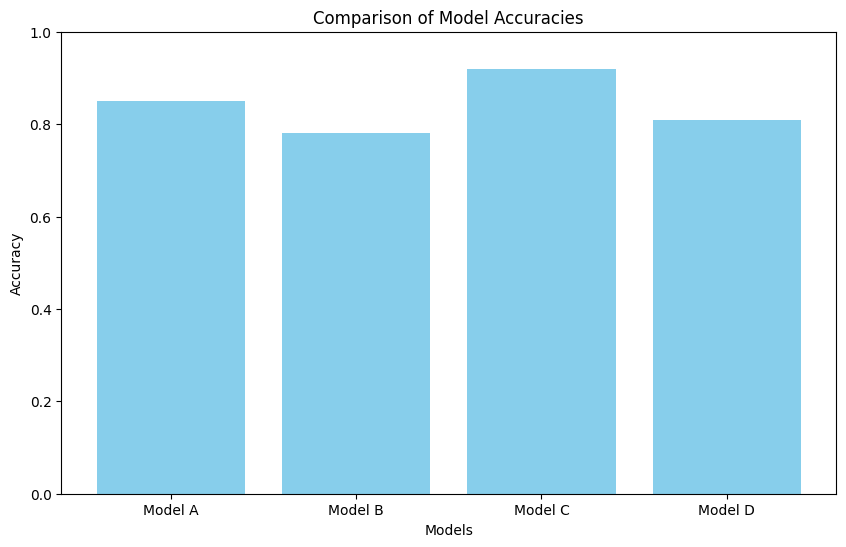

In [1]:
# code block to compare accuracies of our different models

import matplotlib.pyplot as plt

# variables needed
models = [] # model names
accuracies = [] # corresponding model accuracies

# plotting code
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='skyblue')
plt.ylim(0, 1)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracies")
plt.show()


In [ ]:
# code for evaluating using quadratic weighted kappa scoring
'''
this is a metric used to assess the agreement between 2 scorers:
in this case the scorer of the data and our autograder.
I found this metric used frequently for evaluation when I researched our...
problem for previous project steps
'''

from sklearn.metrics import cohen_kappa_score

# calculate the quadratic weighted kappa score
qwk = cohen_kappa_score(y_actual, y_pred, weights='quadratic')
print("Quadratic Weighted Kappa Score:", qwk)
